In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

In [3]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
target = df['label']
target = target.replace('male', 0)
target = target.replace('female', 1)
df = df.drop('label', axis  =1)

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_standardized.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3168.000000,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03,3.168000e+03
mean,2.870880e-16,7.177199e-17,-1.256010e-16,-3.588600e-17,-1.103494e-15,1.435440e-16,-7.850062e-17,0.000000,2.512020e-15,-2.870880e-16,1.435440e-16,2.870880e-16,-4.306320e-16,1.435440e-16,-1.238067e-15,-1.973730e-16,-8.971499e-17,7.177199e-17,-1.794300e-17,-2.242875e-17
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00
min,-4.731813e+00,-2.328145e+00,-4.803987e+00,-2.881056e+00,-7.692595e+00,-1.630614e+00,-7.072008e-01,-0.255731,-3.479385e+00,-2.092137e+00,-2.141210e+00,-4.731813e+00,-2.701027e+00,-1.406398e+00,-5.179122e+00,-1.564205e+00,-7.546946e-01,-1.431422e+00,-1.419137e+00,-1.454772e+00
25%,-5.764854e-01,-9.112773e-01,-4.408861e-01,-6.034077e-01,-6.777227e-01,-9.759992e-01,-3.515680e-01,-0.229038,-7.408115e-01,-8.460943e-01,-6.123269e-01,-5.764854e-01,-7.990335e-01,-9.667821e-01,-1.620744e-01,-7.795958e-01,-7.084043e-01,-8.455841e-01,-8.381082e-01,-6.194614e-01
50%,1.314406e-01,1.218739e-01,1.213526e-01,-3.475757e-03,3.889284e-02,2.330866e-01,-2.224288e-01,-0.209403,1.476408e-01,-6.693925e-02,2.761577e-01,1.314406e-01,-7.084407e-02,4.843493e-01,4.104803e-01,-1.207645e-01,-4.615229e-01,-1.564768e-02,-1.401262e-02,-2.879753e-01
75%,6.097473e-01,5.942754e-01,6.876044e-01,7.290261e-01,7.994535e-01,6.981837e-01,-4.916990e-02,-0.169891,7.468220e-01,7.068430e-01,7.231732e-01,6.097473e-01,8.289300e-01,5.777400e-01,6.189829e-01,6.626172e-01,2.791215e-01,5.568753e-01,5.675713e-01,2.966600e-01
max,2.347370e+00,3.492409e+00,2.079633e+00,2.196155e+00,2.060643e+00,3.925441e+00,7.449607e+00,9.436434,1.931618e+00,2.449219e+00,1.486164e+00,2.347370e+00,2.935963e+00,8.704820e+00,6.740922e-01,4.053288e+00,6.420297e+00,4.777568e+00,4.787384e+00,6.351733e+00


In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_standardized, target, test_size=0.2, random_state=43)

In [9]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
knn.fit(Xtrain, Ytrain)
predict = knn.predict(Xtest)

Accuracy: 0.97
              precision    recall  f1-score   support

           0     0.9591    0.9839    0.9713       310
           1     0.9842    0.9599    0.9719       324

    accuracy                         0.9716       634
   macro avg     0.9716    0.9719    0.9716       634
weighted avg     0.9719    0.9716    0.9716       634



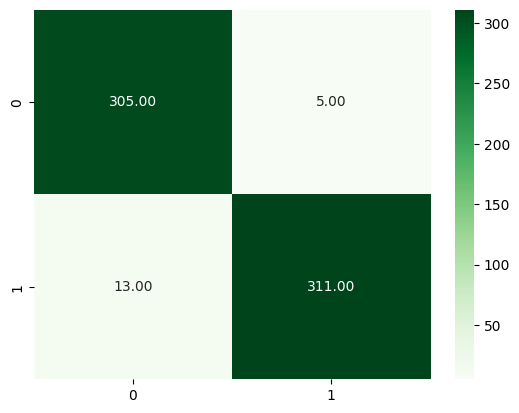

In [11]:
cm = confusion_matrix(Ytest, predict)
report = classification_report(Ytest, predict, digits =4)
sb.heatmap(cm, cmap = 'Greens', annot = True, fmt='.2f')
accuracy = accuracy_score(Ytest, predict)
print(f'Accuracy: {accuracy:.2f}')
print(report)

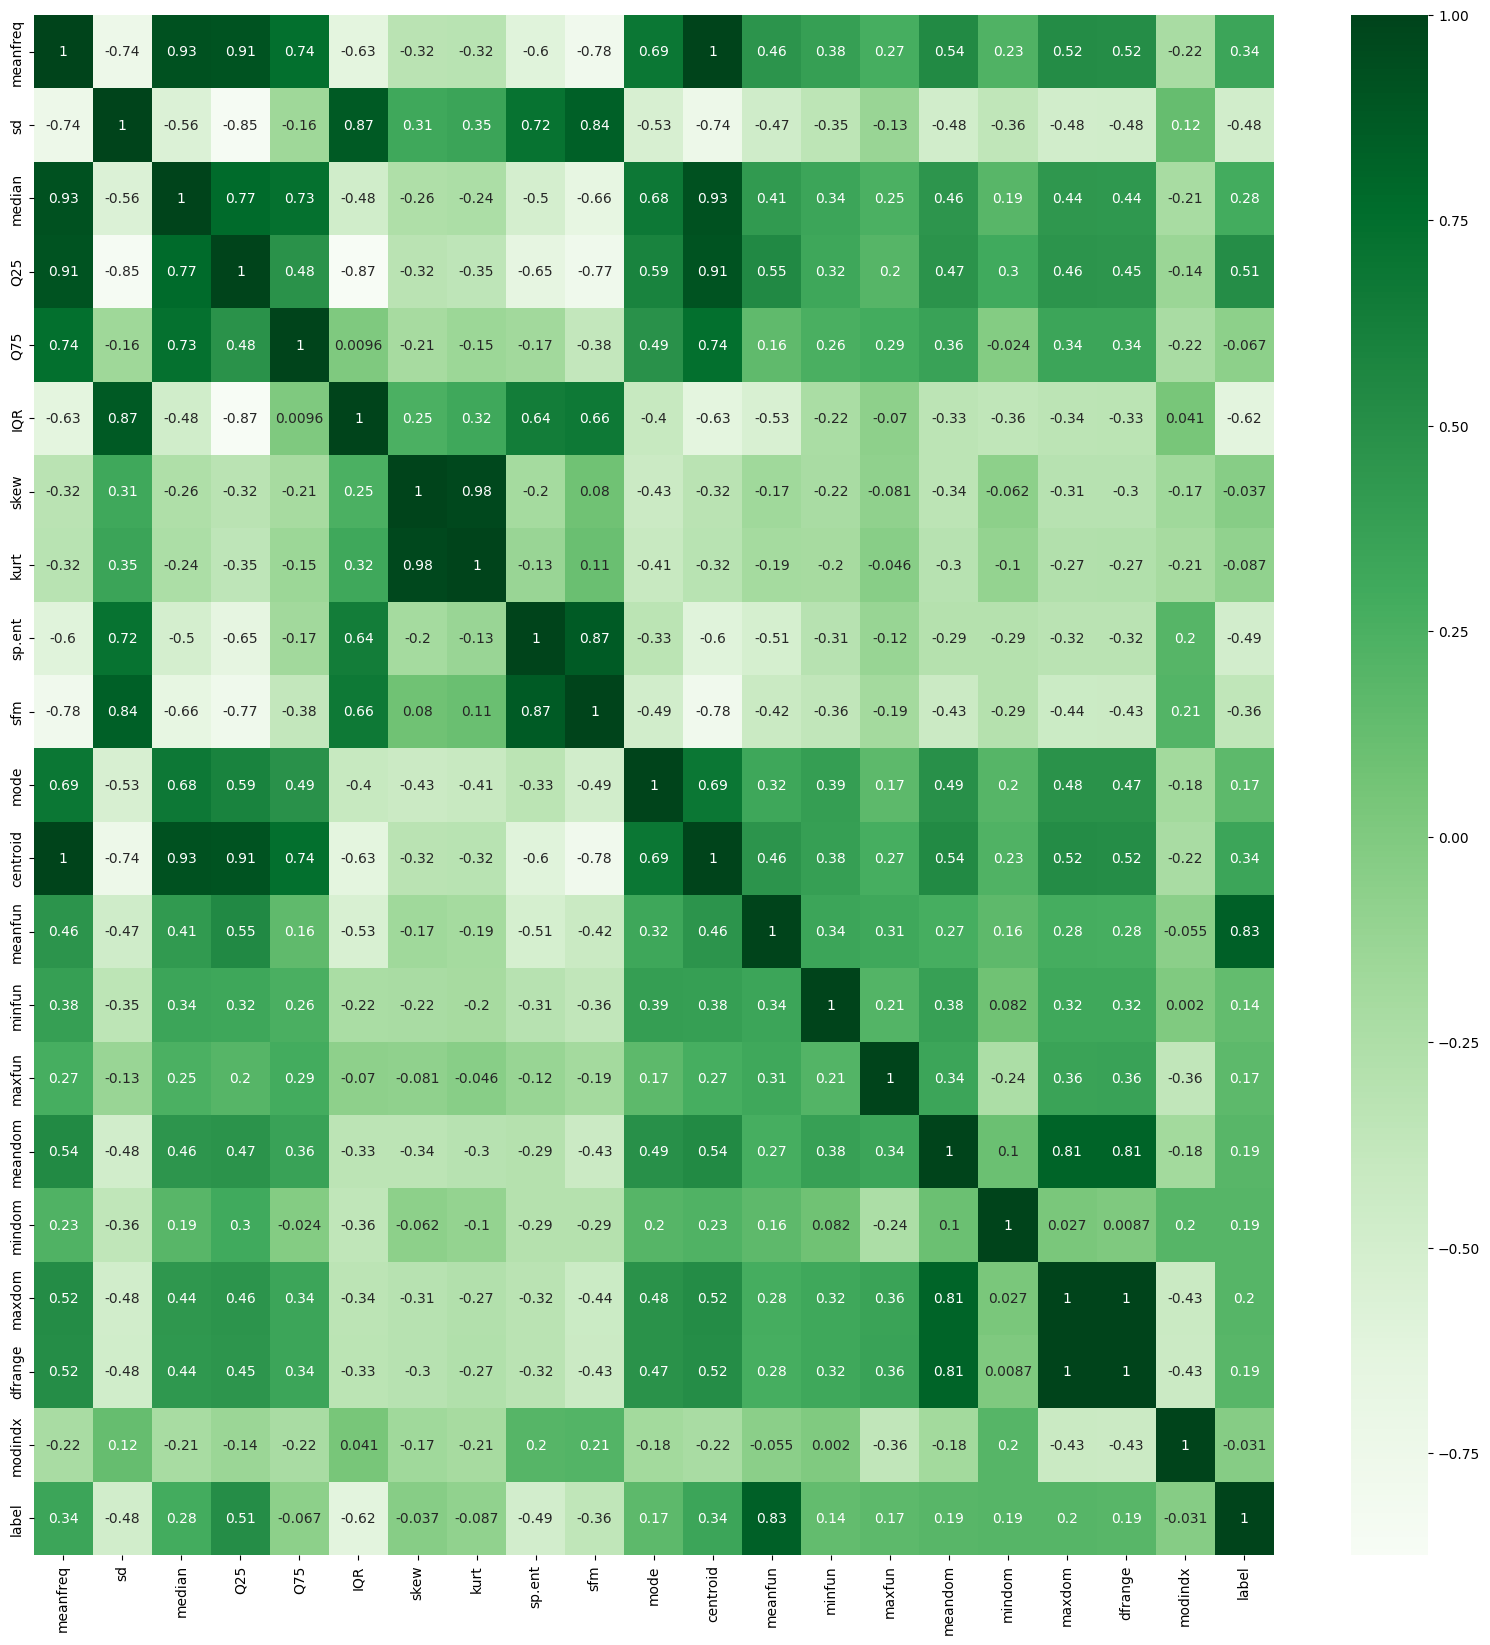

In [12]:
tempDf = pd.concat([df,target], axis = 1)
corMat = tempDf.corr()
plt.figure(figsize = (20, 20))
sb.heatmap(corMat, cmap = 'Greens', annot = True)
plt.show()

Text(0, 0.5, 'Features')

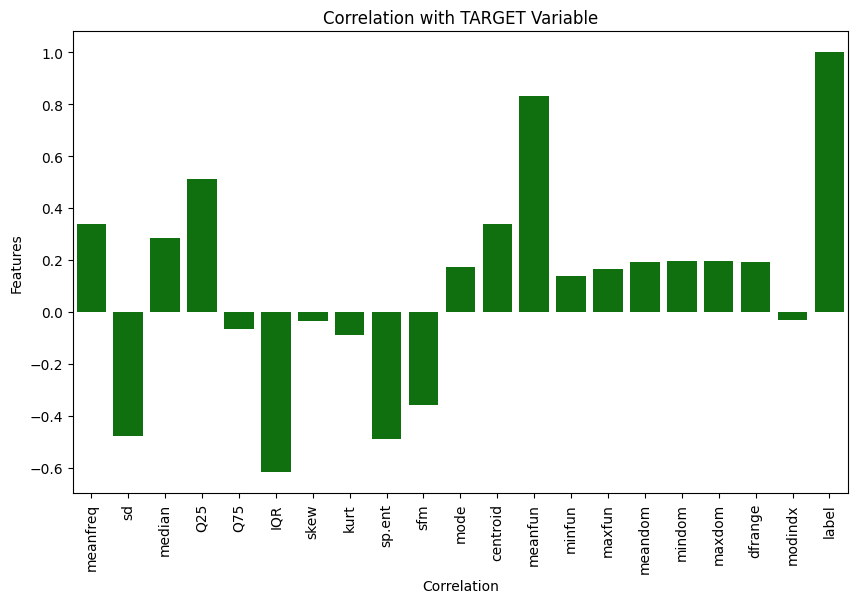

In [13]:
corrValues = corMat['label']
plt.figure(figsize=(10, 6))
sb.barplot(x=corrValues.index, y=corrValues.values, color='g')
plt.title('Correlation with TARGET Variable')
plt.xlabel('Correlation')
plt.xticks(rotation='vertical')
plt.ylabel('Features')

In [14]:
np.random.seed(10)
weights = np.random.random(20)
wKnn = KNeighborsClassifier(metric = 'wminkowski', p = 2, metric_params = {'w':weights})

In [15]:
weights

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578])

In [16]:
wKnn.fit(Xtrain, Ytrain)
Wpredict = wKnn.predict(Xtest)

C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(


Accuracy: 0.94
              precision    recall  f1-score   support

           0     0.9149    0.9710    0.9421       310
           1     0.9705    0.9136    0.9412       324

    accuracy                         0.9416       634
   macro avg     0.9427    0.9423    0.9416       634
weighted avg     0.9433    0.9416    0.9416       634



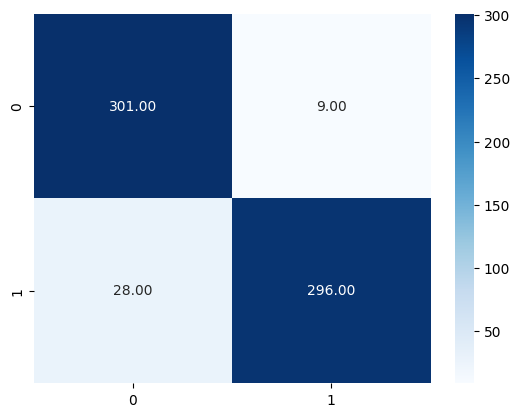

In [17]:
cm = confusion_matrix(Ytest, Wpredict)
report = classification_report(Ytest, Wpredict, digits =4)
sb.heatmap(cm, cmap = 'Blues', annot = True, fmt='.2f')
accuracy = accuracy_score(Ytest, Wpredict)
print(f'Accuracy: {accuracy:.2f}')
print(report)

In [18]:
weights

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096,
       0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578])

In [19]:
temp= corMat.iloc[-1,:-1]
temp

meanfreq    0.337415
sd         -0.479539
median      0.283919
Q25         0.511455
Q75        -0.066906
IQR        -0.618916
skew       -0.036627
kurt       -0.087195
sp.ent     -0.490552
sfm        -0.357499
mode        0.171775
centroid    0.337415
meanfun     0.833921
minfun      0.136692
maxfun      0.166461
meandom     0.191067
mindom      0.194974
maxdom      0.195657
dfrange     0.192213
modindx    -0.030801
Name: label, dtype: float64

In [20]:
high_corr = temp.nlargest(4).index
high_index = temp.index.get_indexer(high_corr)

new_weights = np.copy(weights)
new_weights[high_index] = [4, 3, 2, 1]
#new_weights
high_corr

Index(['meanfun', 'Q25', 'meanfreq', 'centroid'], dtype='object')

In [21]:
tKnn = KNeighborsClassifier(metric = 'wminkowski', p = 2, metric_params = {'w':new_weights})

C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_pairwise_distances_reduction\_dispatcher.py:277: FutureWarning: WMinkowskiDistance is deprecated in version 1.1 and will be removed in version 1.3. Use MinkowskiDistance instead. Note that in MinkowskiDistance, the weights are applied to the absolute differences raised to the p power. This is different from WMinkowskiDistance where weights are applied to the absolute differences before raising to the p power. The deprecation aims to remain consistent with SciPy 1.8 convention.
  return ArgKmin64.compute(


Accuracy: 0.9826
              precision    recall  f1-score   support

           0     0.9902    0.9742    0.9821       310
           1     0.9757    0.9907    0.9832       324

    accuracy                         0.9826       634
   macro avg     0.9829    0.9825    0.9826       634
weighted avg     0.9828    0.9826    0.9826       634



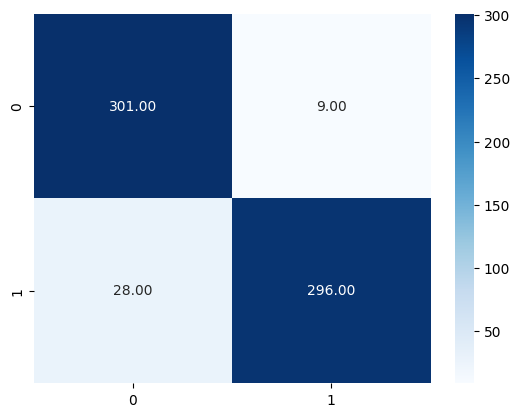

In [22]:
tKnn.fit(Xtrain, Ytrain)
tpredict = tKnn.predict(Xtest)
cm = confusion_matrix(Ytest, Wpredict)
report = classification_report(Ytest, tpredict, digits =4)
sb.heatmap(cm, cmap = 'Blues', annot = True, fmt='.2f')
accuracy = accuracy_score(Ytest, tpredict)
print(f'Accuracy: {accuracy:.4f}')
print(report)

# Find the optimum value of k


Best k: 3, Best Mean Accuracy: 0.9747440166817093


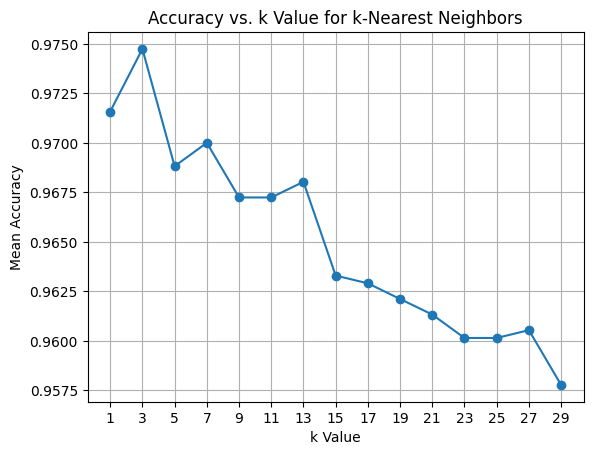

In [38]:
# Search space for k (from 1 to 30 with a step size of 2)
k_values = np.arange(1, 31, 2)

# Initialize a dictionary to store the mean accuracy for each k
k_accuracy = {}

# Perform k-fold cross-validation for each value of k
k_fold = 10  # Number of folds for cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain, Ytrain, cv=k_fold, scoring='accuracy')
    k_accuracy[k] = scores.mean()

# Find the optimum value of k with the highest accuracy
best_k = max(k_accuracy, key=k_accuracy.get)
best_accuracy = k_accuracy[best_k]

print(f"\nBest k: {best_k}, Best Mean Accuracy: {best_accuracy}")

# Step 4: Plot the graph for accuracy vs. k value
plt.plot(k_accuracy.keys(), k_accuracy.values(), marker='o')
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs. k Value for k-Nearest Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# print("Results:")
# for k, accuracy in k_accuracy.items():
#     print(f"k = {k}, Mean Accuracy = {accuracy}")

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

knn_classifier.fit(Xtrain, Ytrain)

opredict = knn_classifier.predict(Xtest)

In [28]:
cm = confusion_matrix(Ytest, opredict)
report = classification_report(Ytest, opredict, digits =4)
print(cm)
accuracy = accuracy_score(Ytest, opredict)
print(f'Accuracy: {accuracy:.4f}')
print(report)

[[305   5]
 [ 13 311]]
Accuracy: 0.9716
              precision    recall  f1-score   support

           0     0.9591    0.9839    0.9713       310
           1     0.9842    0.9599    0.9719       324

    accuracy                         0.9716       634
   macro avg     0.9716    0.9719    0.9716       634
weighted avg     0.9719    0.9716    0.9716       634



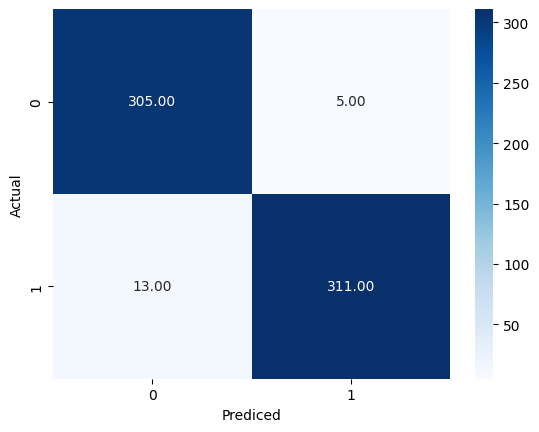

In [29]:
sb.heatmap(cm, cmap="Blues", annot=True, fmt='.2f')
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()